## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

## Logging configurations

In [2]:
import logging

# Set logging configurations
logging.basicConfig(level=logging.DEBUG)

## EDA: Descriptive Statistics

### Read dataset

In [3]:
def read_csv_file(file_path: str) -> pd.DataFrame:
    '''
    Reads a CSV file and returns its content as a pandas DataFrame.

    Args:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame or None: A pandas DataFrame containing the data 
        from the CSV file, or None if the file is not found.
    '''
    try:
        data = pd.read_csv(file_path)
        logging.info('✅ Data loaded successfully from file: %s', file_path)
        return data
    except FileNotFoundError:
        logging.error('❌ File not found at path: %s', file_path)
        return None


def display_dataframe(data: pd.DataFrame) -> None:
    '''
    Displays the first 5 rows of a Pandas DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame to be displayed.

    Returns:
        None
    '''
    try:
        if isinstance(data, pd.DataFrame):
            display(data.head())
            display(data.dtypes.value_counts())
        else:
            raise ValueError('❌ Invalid input: Not a Pandas DataFrame')
    except ValueError as error:
        logging.error(error)
    except AttributeError:
        logging.error('❌ It was not possible to show the types of this file.')

data = read_csv_file("./files/heart_disease_prediction.csv")
display_dataframe(data)

INFO:root:✅ Data loaded successfully from file: ./files/heart_disease_prediction.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


int64      6
object     5
float64    1
dtype: int64

### Types of values

In [4]:
def column_types_and_counts(data: pd.DataFrame) -> None:
    '''
    Displays the data types and counts of columns in a Pandas DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame for which column types are to be displayed.

    Returns:
        None
    '''
    try:
        if isinstance(data, pd.DataFrame):
            display(data.dtypes)
        else:
            raise ValueError('❌ Invalid input: Not a Pandas DataFrame')
    except ValueError as error:
        logging.error(error)

column_types_and_counts(data)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Description

In [5]:
def show_description(data: pd.DataFrame, include: bool = False) -> None:
    '''
    Displays the description of a DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame to display the description of.
        include (bool, optional): Whether to include object data types. Defaults to False.

    Returns:
        None
    '''
    try:
        if include:
            description = data.describe(include=['object'])
        else:
            description = data.describe()
        display(description)
    except AttributeError as error:
        logging.error('❌ An error occurred while showing the description: %s', error)

show_description(data)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Checking Nan values

In [6]:
def verify_na_values(data: pd.DataFrame) -> None:
    '''
    Verifies and displays missing values in the DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame to be checked for missing values.

    Returns:
        None
    '''
    nan_counts = data.isna().sum()
    display(nan_counts)

    columns_with_nan = nan_counts[nan_counts != 0]
    if not columns_with_nan.empty:
        logging.warning("⚠️ There are columns with missing values. Details:")
        for column, count in columns_with_nan.items():
            logging.warning("Column '%s' has %s missing values.", column, count)
        logging.warning("Consider preprocessing these values soon!")
    else:
        logging.info("✅ No missing values found in the DataFrame.")

verify_na_values(data)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

INFO:root:✅ No missing values found in the DataFrame.


### EDA: categorical data

In [7]:
show_description(data, include=True)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [8]:
def show_unique_values(columns: list, data: pd.DataFrame) -> None:
    '''
    Displays unique values for specified columns in the DataFrame.

    Args:
        columns (list): List of column names to display unique values for.
        data (pd.DataFrame): The DataFrame to extract unique values from.

    Returns:
        None
    '''
    try:
        for column in columns:
            if column in data.columns:
                display(f'Column {column}:')
                display(data[column].unique())
            else:
                logging.warning("⚠️ Column '%s' does not exist in the dataframe.", column)
    except KeyError:
        logging.error("❌ One of the columns passed in the list doesn't exist in the dataframe")

show_unique_values(['FastingBS', 'HeartDisease', 'teste'], data)

'Column FastingBS:'

array([0, 1], dtype=int64)

'Column HeartDisease:'

array([0, 1], dtype=int64)

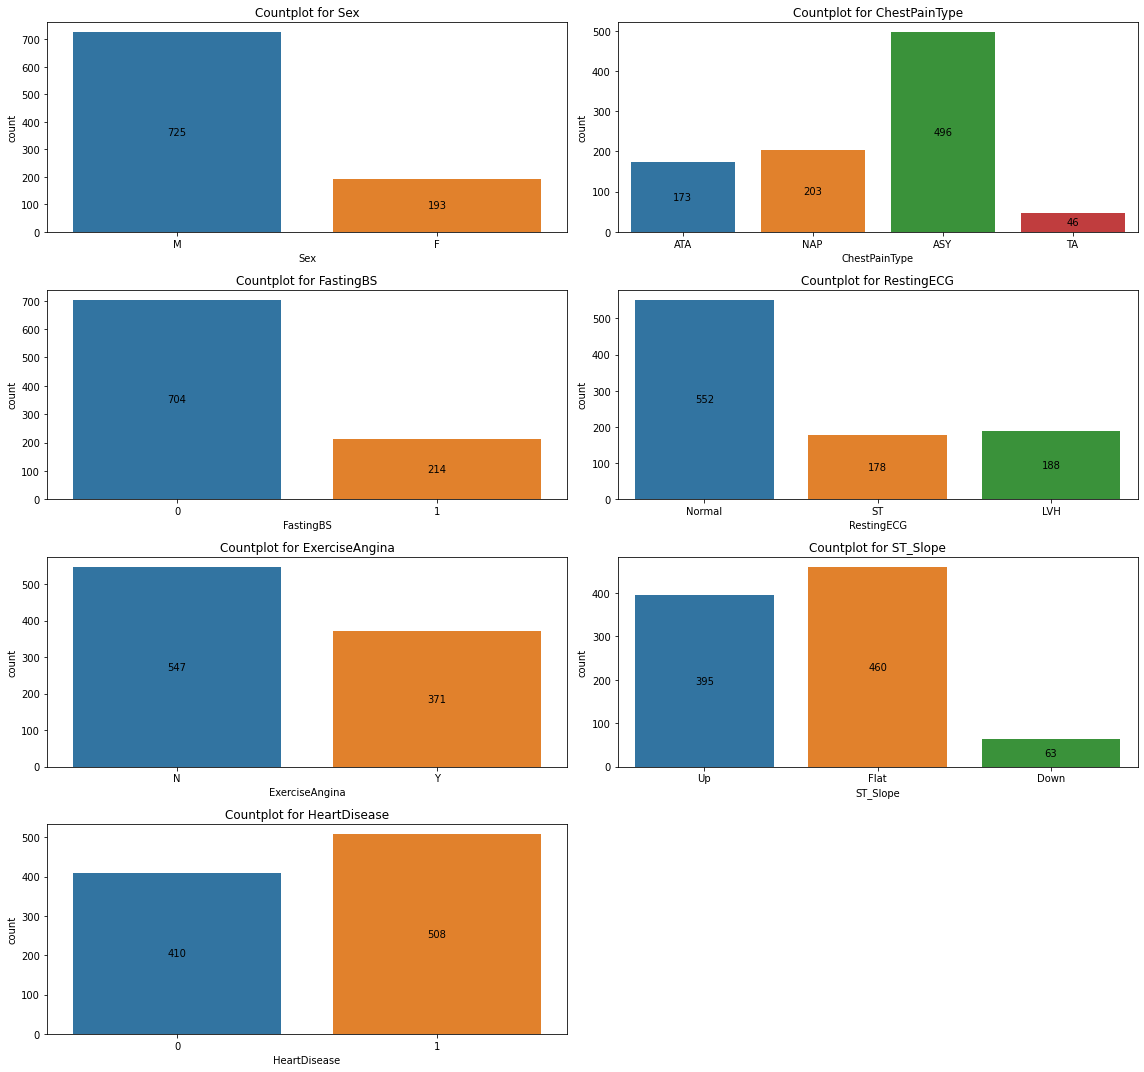

In [10]:
def categorical_plot(cols_list: list, data: pd.DataFrame) -> None:
    '''
    Displays countplots for specified categorical columns in the DataFrame.

    Args:
        cols_list (list): List of column names to create countplots for.
        data (pd.DataFrame): The DataFrame containing the categorical columns.

    Returns:
        None
    '''
    try:
        # Computes the number of lines and columns in the plot
        cols = 2
        cols_size = len(cols_list)
        lines = cols_size // cols + (cols_size % cols > 0)

        # Creates the figure and subplots
        fig, axes = plt.subplots(lines, cols, figsize=(16, 15))
        axes = axes.flatten()

        for idx, col in enumerate(cols_list):
            if col in data.columns:
                sns.countplot(x=data[col], ax=axes[idx])
                axes[idx].set_title(f'Countplot for {col}')
                # Add data labels to each bar
                for container in axes[idx].containers:
                    axes[idx].bar_label(container, label_type="center")
            else:
                logging.warning("⚠️ Column '%s' does not exist in the dataframe.", col)

        # Remove empty subplots
        for i in range(len(cols_list), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

    except KeyError:
        logging.error('''❌ One of the columns passed in the list
                            doesn't exist in the dataframe''')

categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG",
    "ExerciseAngina", "ST_Slope", "HeartDisease"]
categorical_plot(categorical_cols, data)

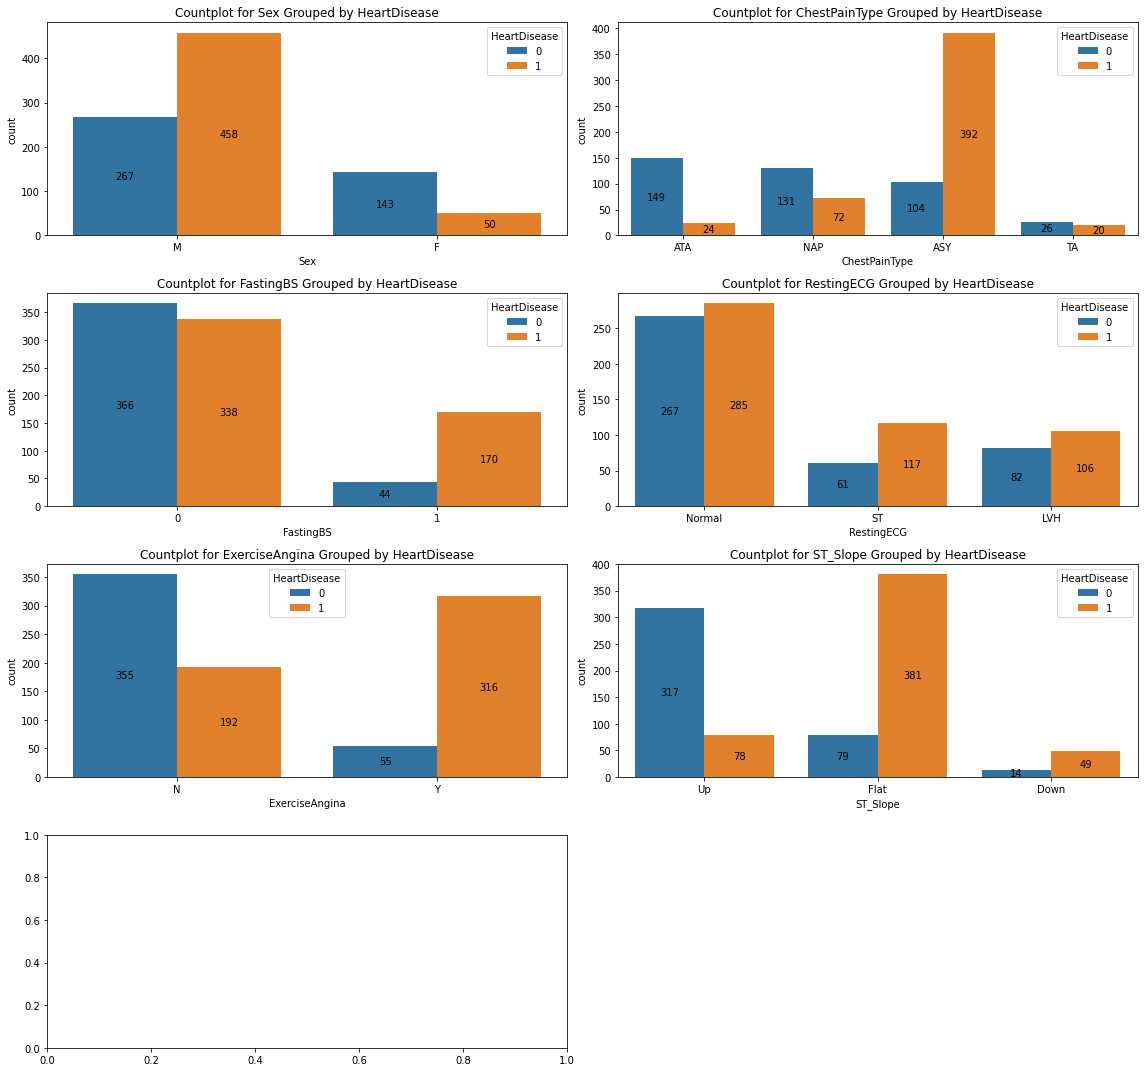

In [11]:
def categorial_plot_by_label(cols_list: list, label: str, data: pd.DataFrame) -> None:
    '''
    Displays countplots for specified categorical columns in the DataFrame, 
    grouped by the specified label column.

    Args:
        cols_list (list): List of column names to create countplots for.
        label (str): The column name to group the countplots by.
        data (pd.DataFrame): The DataFrame containing the categorical columns and the label column.

    Returns:
        None
    '''
    try:
        # Computes the number of lines and columns in the plot
        cols = 2
        cols_size = len(cols_list)
        lines = cols_size // cols + (cols_size % cols > 0)

        # Creates the figure and subplots
        fig, axes = plt.subplots(lines, cols, figsize=(16, 15))
        axes = axes.flatten()

        for idx, col in enumerate(cols_list[:-1]):
            if col in data.columns:
                sns.countplot(x=data[col], hue=data[label], ax=axes[idx])
                axes[idx].set_title(f'Countplot for {col} Grouped by {label}')
                # Add data labels to each bar
                for container in axes[idx].containers:
                    axes[idx].bar_label(container, label_type="center")
            else:
                logging.warning("⚠️ Column '%s' does not exist in the dataframe.", col)

        # Remove empty subplots
        for i in range(len(cols_list), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

    except KeyError:
        logging.error("❌ One of the columns passed in the list doesn't exist in the dataframe")

categorial_plot_by_label(categorical_cols, "HeartDisease", data)

## Data cleaning

In [12]:
def show_zero_values(columns: list, data: pd.DataFrame) -> None:
    '''
    Identifies and displays rows where specified columns have values equal to zero.

    Args:
        columns (list): List of column names to check for zero values.
        data (pd.DataFrame): The DataFrame containing the specified columns.

    Returns:
        None
    '''
    try:
        for column in columns:
            zero_values = data[data[column] == 0]
            if not zero_values.empty:
                logging.info("Rows with zero values in column %s.", column)
                display(zero_values)
            else:
                logging.info("No zero values found in column %s.", column)
    except KeyError as error:
        logging.error("❌ Error: Column %s does not exist in the dataframe.", error.args[0])

columns = ["RestingBP", "Cholesterol"]
show_zero_values(columns, data)

INFO:root:Rows with zero values in column RestingBP.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


INFO:root:Rows with zero values in column Cholesterol.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [13]:
# Creates a new copy to start data cleaning
data_clean = data.copy()

# Only keep non-zero values for RestingBP
data_clean = data_clean[data_clean["RestingBP"] != 0]

# Creates a mask according to the value of HeartDisease
mask = data_clean["HeartDisease"]==0

# Selects Cholesterol column according to the mask
cholesterol_without_heartdisease = data_clean.loc[mask, "Cholesterol"]
cholesterol_with_heartdisease = data_clean.loc[~mask, "Cholesterol"]

# Replate values for Cholesterol according to the mask
data_clean.loc[mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(
    to_replace = 0, value = cholesterol_without_heartdisease.median())
data_clean.loc[~mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(
    to_replace = 0, value = cholesterol_with_heartdisease.median())

In [14]:
show_description(data_clean)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,239.700109,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,54.352727,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Feature selection

In [15]:
# Converts categorical columns into indicator columns
data_clean = pd.get_dummies(data_clean, drop_first=True)
display_dataframe(data_clean)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


uint8      9
int64      6
float64    1
dtype: int64

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001439A608A30>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001439A608A30> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


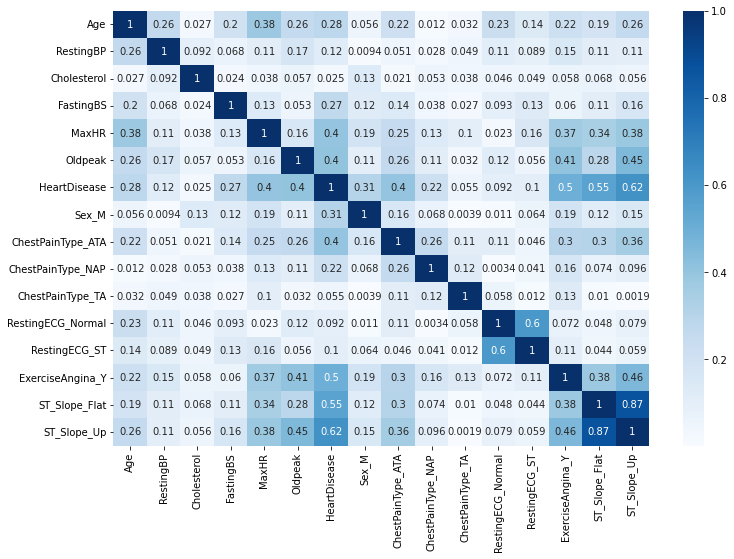

In [17]:
class InvalidLimitCorrelationFilter(Exception):
    '''
    Raised when a invalid limit is used to filter the correlation plot
    '''

def show_correlations(data: pd.DataFrame, limit: float = None) -> None:
    '''
    Calculates and plots the absolute correlations of a DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame for which correlations need to be calculated.
        limit (float, optional): The correlation threshold for displaying correlations.
            Must be between 0 and 1. Defaults to None.

    Returns:
        None
    '''
    try:
        if limit is not None:
            if 0 < limit < 1:
                correlations = abs(data.corr())
                plt.figure(figsize=(12, 8))
                sns.heatmap(correlations[correlations > limit], annot=True, cmap="Blues")
            else:
                raise InvalidLimitCorrelationFilter('❌ The limit must be between 0 and 1!')
        else:
            correlations = abs(data.corr())
            plt.figure(figsize=(12, 8))
            sns.heatmap(correlations, annot=True, cmap="Blues")
    except InvalidLimitCorrelationFilter as error:
        logging.error(error)

show_correlations(data_clean)

In [18]:
show_correlations(data_clean, limit=1.3)

ERROR:root:❌ The limit must be between 0 and 1!


## Building a Classifier with One Feature

In [19]:
def separate_features_label(data: pd.DataFrame) -> tuple:
    '''
    Separates features from the label in the given DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing both features and labels.

    Returns:
        tuple: A tuple containing two elements - X (features) and y (labels).
    '''
    X = data.drop(columns=["HeartDisease"])
    y = data["HeartDisease"]
    return X, y

X, y = separate_features_label(data_clean)
x_train, x_val, y_train, y_val = train_test_split(
    X, y, test_size=0.7, random_state=417)

# Selecting features to apply in KNN
features = ["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]

In [20]:
def train_knn(features: list, x_train: pd.DataFrame, y_train: pd.Series,
              x_val: pd.DataFrame, y_val: pd.Series) -> None:
    '''
    Trains KNN classifiers for each specified feature and calculates the accuracies.

    Args:
        features (list): List of feature names to train the classifiers.
        x_train (pd.DataFrame): DataFrame containing training features.
        y_train (pd.Series): Series containing training labels.
        x_val (pd.DataFrame): DataFrame containing validation features.
        y_val (pd.Series): Series containing validation labels.

    Returns:
        None
    '''
    for feature in features:
        # Defining the model
        knn = KNeighborsClassifier(n_neighbors=3)
        logging.info('ℹ️ Starting training with feature %s', feature)
        # Training the model
        knn.fit(x_train[[feature]], y_train)
        # Calculating the accuracy
        accuracy = knn.score(x_val[[feature]], y_val)
        accuracy_formatted = round(accuracy * 100, 2)
        logging.info('''The k-NN classifier trained on %s and
        with k = 3 has an accuracy of %s%%''', feature, accuracy_formatted)

train_knn(features, x_train, y_train, x_val, y_val)

INFO:root:ℹ️ Starting training with feature Oldpeak
INFO:root:The k-NN classifier trained on Oldpeak and
        with k = 3 has an accuracy of 57.63%
INFO:root:ℹ️ Starting training with feature Sex_M
INFO:root:The k-NN classifier trained on Sex_M and
        with k = 3 has an accuracy of 65.26%
INFO:root:ℹ️ Starting training with feature ExerciseAngina_Y
INFO:root:The k-NN classifier trained on ExerciseAngina_Y and
        with k = 3 has an accuracy of 74.45%
INFO:root:ℹ️ Starting training with feature ST_Slope_Flat
INFO:root:The k-NN classifier trained on ST_Slope_Flat and
        with k = 3 has an accuracy of 54.83%
INFO:root:ℹ️ Starting training with feature ST_Slope_Up
INFO:root:The k-NN classifier trained on ST_Slope_Up and
        with k = 3 has an accuracy of 54.83%


## Building a Classifier with Multiple Features

In [21]:
# Apply MixMaxScaler to the dataset
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train[features])
x_val_scaled = scaler.transform(x_val[features])

In [22]:
# Trains the KNN model with all features of the dataset
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_scaled, y_train)
accuracy = knn.score(x_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 81.78


## Hyperparameter Optimization

In [23]:
# Grid search to find the best hiperparameters for KNN classifier
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [24]:
best_score = knn_grid.best_score_*100
best_params = knn_grid.best_params_
logging.info('The best parameters for KNN are: %s, %s', best_score, best_params)

INFO:root:The best parameters for KNN are: 80.72727272727273, {'metric': 'minkowski', 'n_neighbors': 9}


## Model Evaluation

In [25]:
# Predictions and results on test set
x_test_scaled = scaler.transform(x_val[features])
predictions = knn_grid.best_estimator_.predict(x_test_scaled)
accuracy = accuracy_score(y_val, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 84.42


In [26]:
def comparing_distributions(column: str, X: pd.DataFrame, x_train: pd.DataFrame,
                            x_val: pd.DataFrame) -> None:
    '''
    Compares the distributions of a column in the complete, training, and test datasets.

    Args:
        column (str): The column name to compare distributions.
        X (pd.DataFrame): The complete dataset.
        x_train (pd.DataFrame): The training dataset.
        x_val (pd.DataFrame): The validation dataset.

    Returns:
        None
    '''
    logging.info("Distribution of patients by their %s in the entire dataset", column)
    logging.info(X[column].value_counts())

    logging.info("\nDistribution of patients by their %s in the training dataset", column)
    logging.info(x_train[column].value_counts())

    logging.info("\nDistribution of patients by their %s in the test dataset", column)
    logging.info(x_val[column].value_counts())

comparing_distributions('Sex_M', X, x_train, x_val)

INFO:root:Distribution of patients by their Sex_M in the entire dataset
INFO:root:1    724
0    193
Name: Sex_M, dtype: int64
INFO:root:
Distribution of patients by their Sex_M in the training dataset
INFO:root:1    221
0     54
Name: Sex_M, dtype: int64
INFO:root:
Distribution of patients by their Sex_M in the test dataset
INFO:root:1    503
0    139
Name: Sex_M, dtype: int64
